# ARMA Model
It is a combiantion of the AR and MA model. ARMA(p, q)

## Creating a sample dataset

* In order to simulate the ARMA model, we create a sample dataset.
* For this purpose, we use a built-in function.
* We also do so by randomly initiazing the weights of the AR and MA components.
* Remember, while initializing the weights, the first coeffecient, is always initialized as 1.
* We are considering both the process to be of order 1.

In [23]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
np.random.seed(42)

In [24]:
ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])

In [25]:
ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

In [26]:
ARMA_1_1[:10]

array([0.49671415, 0.47269411, 0.67923972, 2.33009865, 1.90550605,
       0.183942  , 1.42919042, 2.6603591 , 1.09913537, 0.48274777])

## Checking for Stationarity

* We are using the ADF test.

In [27]:
from statsmodels.tsa.stattools import adfuller
ADF = adfuller(ARMA_1_1)
print("ADF Statistic = {}".format(ADF[0]))
print("p-value  = {}".format(ADF[1]))  

ADF Statistic = -6.429878682042681
p-value  = 1.7078466680097764e-08


* As we can see we get a largely negative statistic and a p-value of < 0.05, so the time series is stationary.

## ACF and PACF plot

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

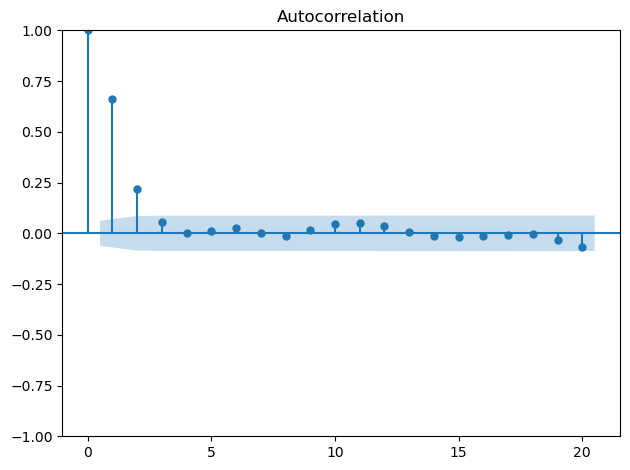

In [29]:
plot_acf(ARMA_1_1, lags=20)
plt.tight_layout()

* As we can see from the ACF plot that the plot forms a sinusoidal pattern, so we can say that the data is not purely MA.
* Also we can see that there is significant upto lag 2, so q=2. However, the q must be equal to 1 as we have defind it previously.
* So the ACF plot cannot be used to infer the value of q.

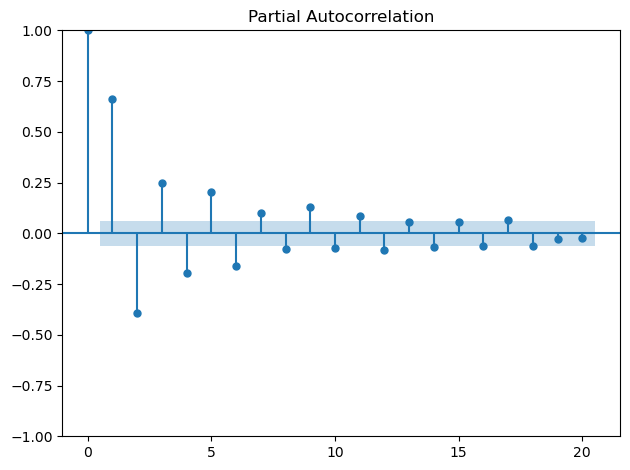

In [30]:
plot_pacf(ARMA_1_1, lags=20, method='ywm')
plt.tight_layout()

* We see similar findings in the PACF plot as well.

## Selecting the model

* For the ARMA model, to find the best fit we have to try and compare different values of p and q for the data.

In [31]:
from itertools import product
ps = range(0, 4, 1)
qs = range(0, 4, 1)
ordered_list = list(product(ps, qs))
ordered_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

## Selecting the best model
* We create a function that will iterate through all combinations of p and q for the ARMA model along with the corresponding AIC (Akaike Information Criterion).
* It will then represent the models along with the AIC values in ascending order in a dataframe.
* We know that the best model will be the one with the lowest AIC value.

In [32]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
def optimize_ARMA(pq_list, data) -> pd.DataFrame:
    """This function gets the list of all p, q values, creates the model for each of the (p, q) values and then finds the AIC value of each of the model and displays the output as a dataframe in
    ascending order of AIC values"""
    result = []
    for p,q in pq_list:
        model = SARIMAX(data, order=(p, 0, q), simple_differencing=False).fit(disp=False)
        aic = model.aic
        result.append([(p, q), aic])
    result_df = pd.DataFrame(result)
    result_df.columns = ['(p, q)', 'AIC']
    # Sorting in ascending order
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [34]:
results = optimize_ARMA(ordered_list, ARMA_1_1)
results

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p, q)",AIC
0,"(1, 1)",2801.407785
1,"(2, 1)",2802.906070
2,"(1, 2)",2802.967762
3,"(0, 3)",2803.666793
4,"(1, 3)",2804.524027
5,"(3, 1)",2804.588567
6,"(2, 2)",2804.822282
7,"(2, 3)",2806.175380
8,"(3, 3)",2806.291253
9,"(3, 2)",2806.894930


* From the AIC data we can see that the model with the lowest AIC value is ARMA(1, 1).
* So we can say that it is the best model when comapared to other models.

## Model Resisdual analysis
* Models' residuals - difference between the actual and predicted values of the model.

In [36]:
model = SARIMAX(ARMA_1_1, order=(1, 0, 1), simple_differencing=False)
model_fit = model.fit()

In [39]:
residuals = model_fit.resid
residuals[:10]

array([ 0.49671415,  0.14772131,  0.44373191,  1.80363131, -0.20982714,
       -0.23742822,  1.57044235,  0.87642338, -0.48627429,  0.56830073])

### Q-Q plot
* If the Q-Q plot is a straight line, then the model is a good fit for the data.

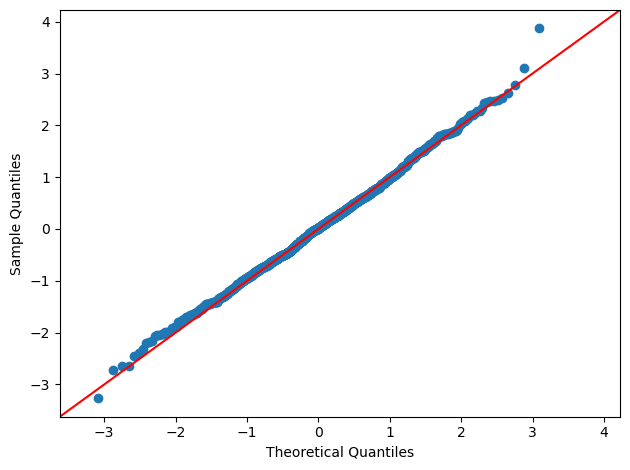

In [43]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='45') # we caompare the data to the straight line y=x hence, angle=45 degrees.
plt.tight_layout()

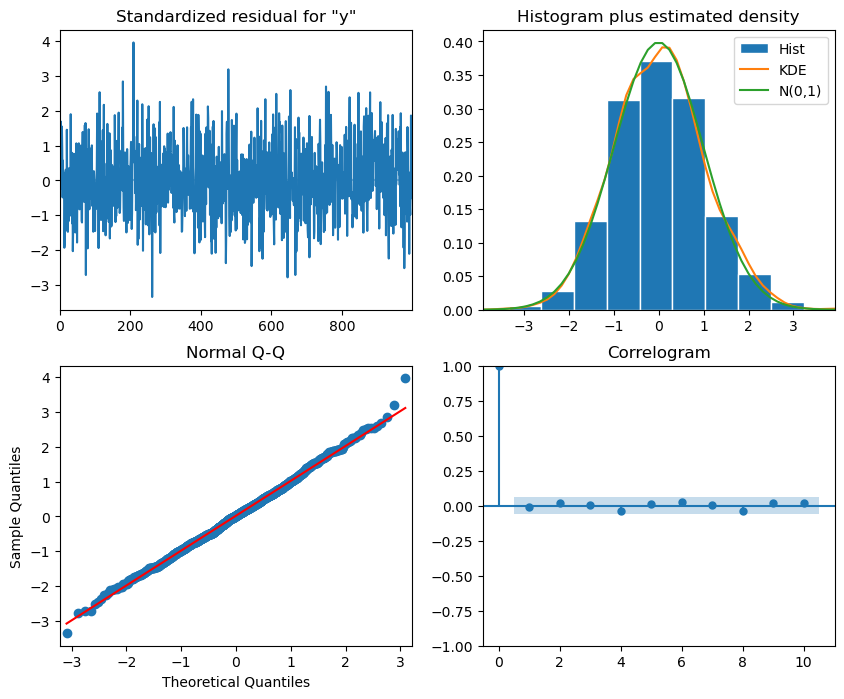

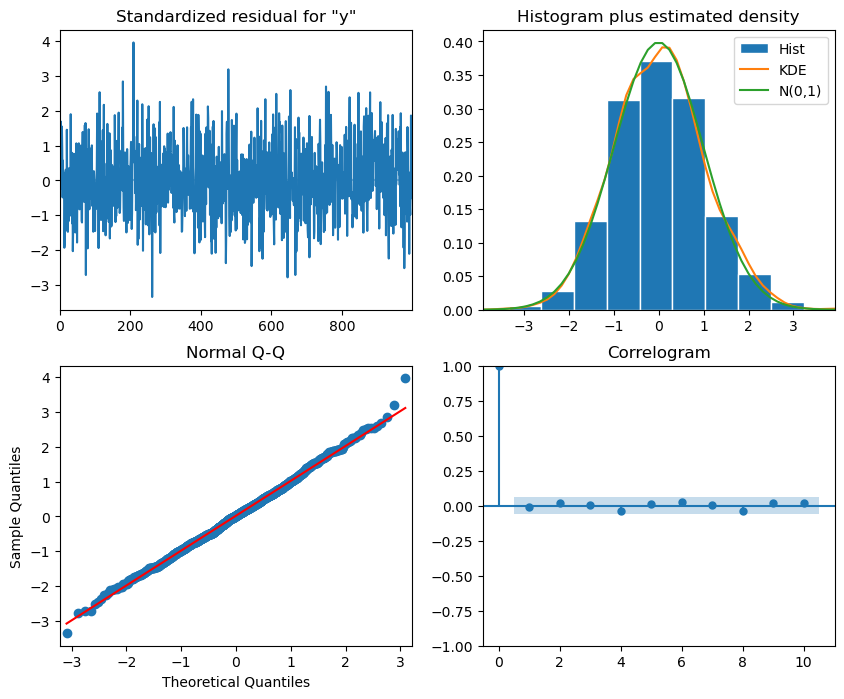

In [46]:
model_fit.plot_diagnostics(figsize=(10, 8))

* (top-left) We can see that there seems to be no particular trend in the data. Also, the mean remains constant so proving stationarity.
* (top-right) As we can see from the histogram plot, the residuals follow a normal distribution, making it similar to white noise.
* (bottom-left) The Q-Q plot is a stright line indicating a good model for the data.
* (bottom-right) There is only a significant peak at lag 0, proving that the residuals are uncorrelated.

### Lijung-Box test
* To check if our residuals are uncorrelated.

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung = acorr_ljungbox(residuals, np.arange(1, 11, 1)) # the arrange specifies the lags upto which we are testing, here we are testing the first 10 lags
ljung['lb_pvalue']

1     0.860897
2     0.767966
3     0.909817
4     0.721089
5     0.810385
6     0.821750
7     0.894063
8     0.817501
9     0.852419
10    0.874093
Name: lb_pvalue, dtype: float64

* The resulting p-values show that all of them are greater than 0.05.
* So, the residuals are uncorrelated.

# Applying ARMA to a dataset

## Exploring the dataset

In [53]:
df = pd.read_csv('Datasets/bandwidth.csv')
df.head()

,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816


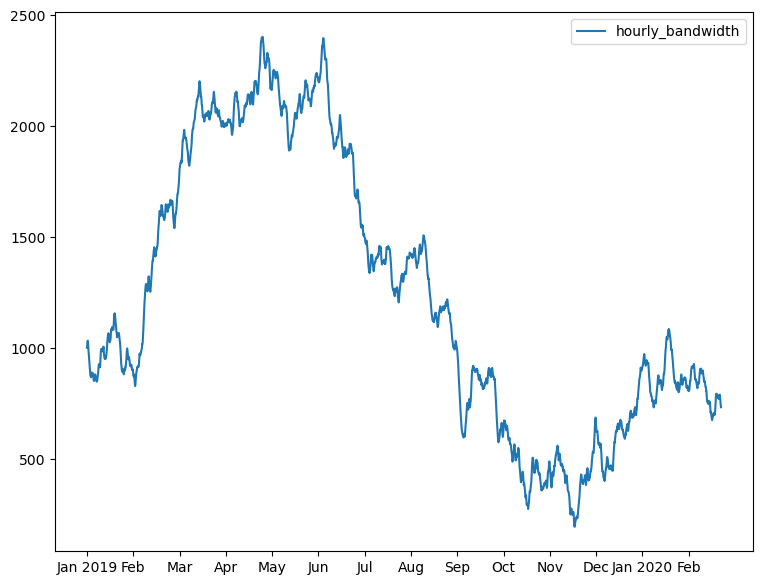

In [61]:
df.plot(figsize=(9, 7))
plt.xticks(
    np.arange(0, 10000, 730), 
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb']
)
plt.autoscale()

## Checking for Stationarity

In [62]:
from statsmodels.tsa.stattools import adfuller
ADF = adfuller(df['hourly_bandwidth'])
print("ADF Statistic = {}".format(ADF[0]))
print("p-value  = {}".format(ADF[1])) 

ADF Statistic = -0.871465319945264
p-value  = 0.7972240255014581


* As we can see, the p-value is greater than 0.05.
* So, the data is not stationary and we have to make it stationary.

## Differencing for stationarity

In [65]:
bandwidth_diff = np.diff(df['hourly_bandwidth'], n=1)

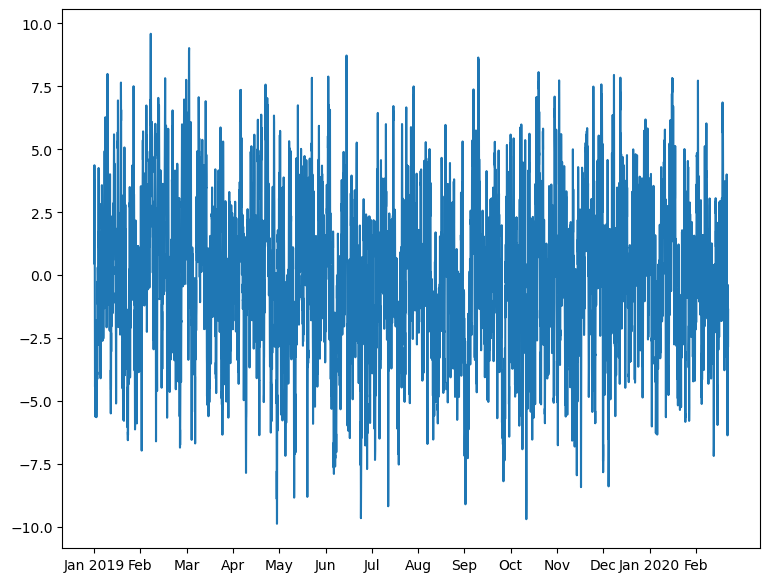

In [69]:
plt.figure(figsize=(9, 7))
plt.plot(bandwidth_diff)
plt.xticks(
    np.arange(0, 10000, 730), 
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb']
)
plt.autoscale()

* As we can see, this data looks a lot more better.
* The mean seems to be constatnt and there isn't any apparent seasonal patterns.

In [71]:
from statsmodels.tsa.stattools import adfuller
ADF_diff = adfuller(bandwidth_diff)
print("ADF Statistic = {}".format(ADF_diff[0]))
print("p-value  = {}".format(ADF_diff[1])) 

ADF Statistic = -20.694853863789014
p-value  = 0.0


* It also passes the ADF test.

## Plotting ACF and PACF plots

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

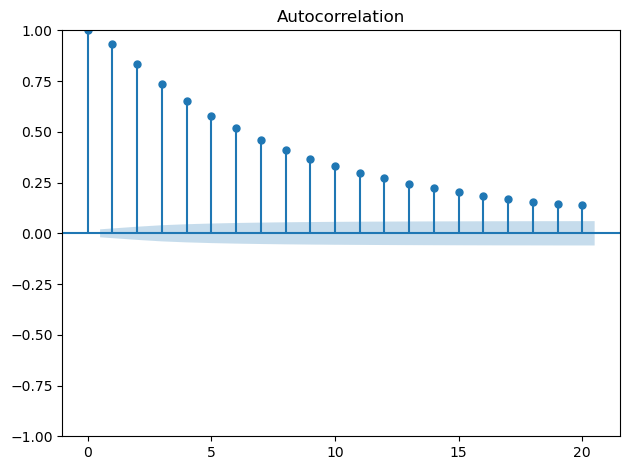

In [74]:
plot_acf(bandwidth_diff, lags=20)
plt.tight_layout()

* As we can see the ACF plot is slowly decaying over time.
* So the data is not purely MA. 

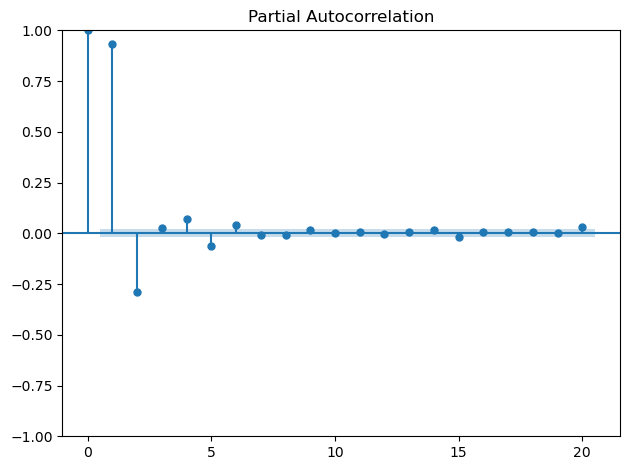

In [75]:
plot_pacf(bandwidth_diff, lags=20, method='ywm')
plt.tight_layout()

* In the PACF plot we can see that appart from the first 2 lags, a sinusoidal pattern emerges.
* So the data is not purely AR.

## Splitting testing and training data

In [76]:
len(df)

10000

In [77]:
train = df[:-200]
test = df[-200:]

In [78]:
len(train), len(test)

(9800, 200)

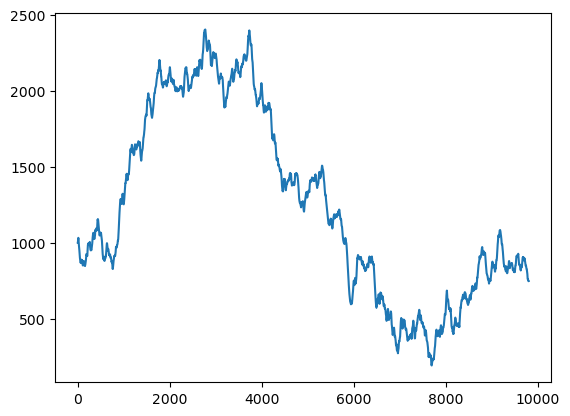

In [79]:
plt.plot(train)

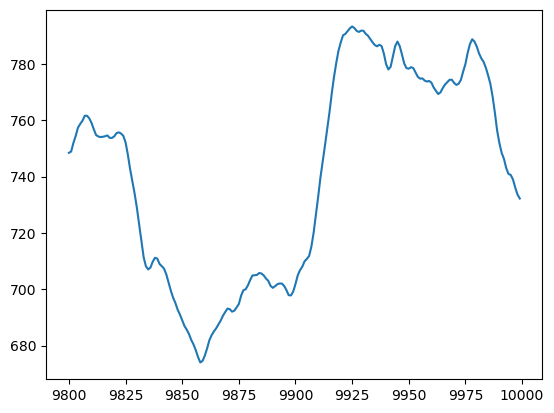

In [80]:
plt.plot(test)

## Selecting the model

In [81]:
from itertools import product
ps = range(0, 4, 1)
qs = range(0, 4, 1)
pq_list = list(product(ps, qs))
pq_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [82]:
print(optimize_ARMA.__doc__)

This function gets the list of all p, q values, creates the model for each of the (p, q) values and then finds the AIC value of each of the model and displays the output as a dataframe in
    ascending order of AIC values


In [85]:
result = optimize_ARMA(pq_list, train['hourly_bandwidth'])

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sar

In [86]:
result

,"(p, q)",AIC
0,"(3, 3)",27921.822018
1,"(3, 2)",27922.069960
2,"(2, 3)",27933.870387
3,"(2, 2)",27981.623229
4,"(3, 1)",28027.051929
5,"(3, 0)",28028.322084
6,"(2, 1)",28101.692056
7,"(2, 0)",28868.454463
8,"(1, 3)",31277.525121
9,"(1, 2)",33446.848652


## Creating the model with Q-Q test and Ljung-Box test

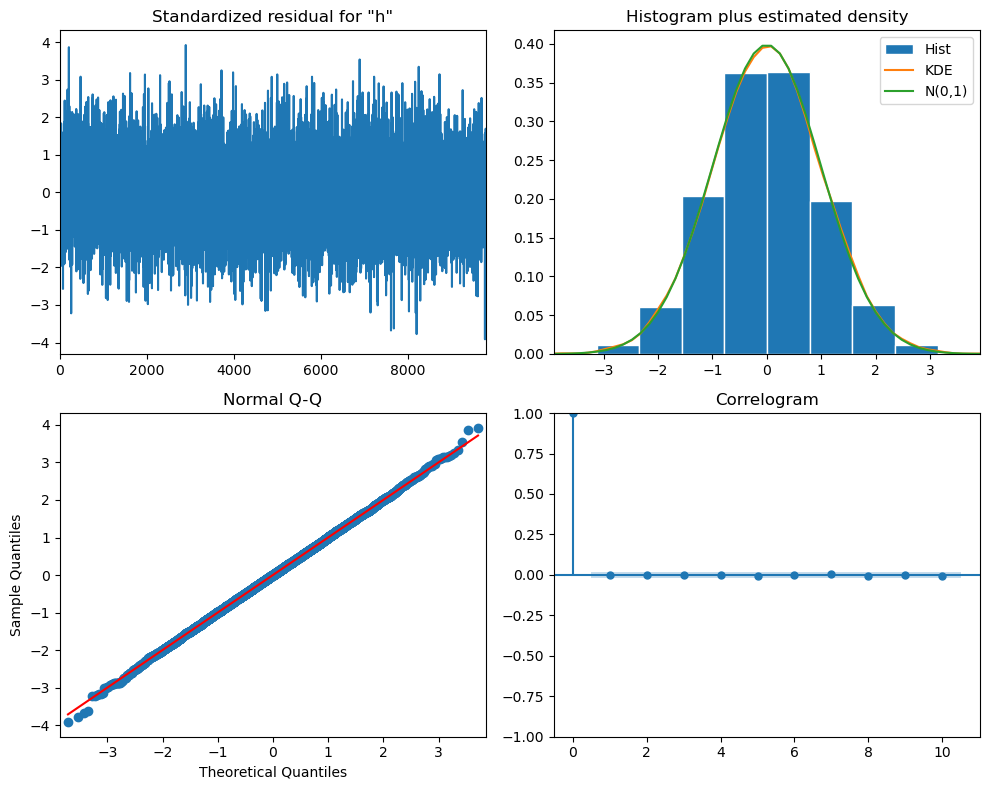

In [89]:
model = SARIMAX(train['hourly_bandwidth'], order=(3, 0, 3), simple_differencing=False)
model_fit = model.fit(disp=False)
model_fit.plot_diagnostics(figsize=(10, 8))
plt.tight_layout()

* All the plots satisfy our requirements.

In [90]:
residuals = model_fit.resid

In [91]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung = acorr_ljungbox(residuals, np.arange(1, 11, 1)) 
ljung['lb_pvalue']

1     0.963005
2     0.996923
3     0.998743
4     0.999899
5     0.999992
6     0.999997
7     1.000000
8     1.000000
9     1.000000
10    1.000000
Name: lb_pvalue, dtype: float64

* All the p values are greater than 0.05. 

## Forcasting with the model

In [114]:
start = len(train) 
end = start + 200 - 1
start, end  

(9800, 9999)

In [115]:
pred_test = model_fit.predict(start=start, end=end, dynamic=False) 

The predicted values are:  9800    747.493907
9801    746.358707
9802    745.413692
9803    744.539261
9804    743.770440
9805    743.076870
9806    742.458315
9807    741.902926
9808    741.405233
9809    740.958166
Name: predicted_mean, dtype: float64


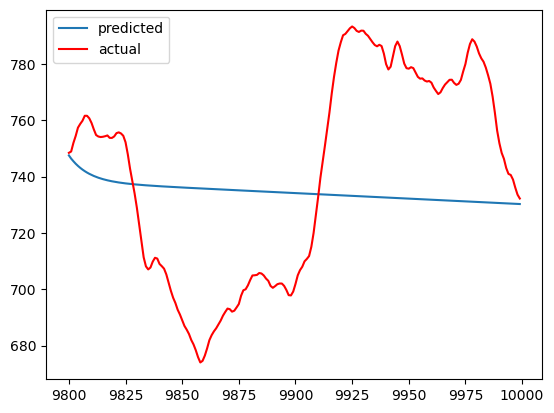

In [118]:
plt.plot(pred_test, label="predicted")
plt.plot(test, color='red', label="actual")
plt.legend()
print("The predicted values are: " ,pred_test[:10])